In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
exemplo = cv2.imread("imagem.jpg", 3)
exemplo = cv2.cvtColor(exemplo, cv2.COLOR_BGR2RGB)

## Introdução
A Protanopia e a Deoutoranopia são tipos específicos de daltonismo. O indivíduo com protanopia tem dificuldades de percepção de tons de cores vermelhos; e o indivíduo com deutoranopia tem dificuldades de percepção de tons de cores verdes. Tal dificuldade é causada por um mal funcionamento das células com a capacidade de reconhecimento de cores, chamadas cones.

###### Esse ou...
A carência de cones funcinais faz com que os cones L não gere estímulos suficientes quando ondas de comprimento longos, associados à cor vermelha, atingem os olhos; e, de igual modo, os cones M com ondas de comprimento médios, associados à cor verde.
###### esse
No caso da protanopia, os cones L, responsáveis pela percepção de ondas de comprimento longos, associados à cor vermelha, não geram estímulos suficientes para intepretar a onda recebida; de mesmo modo, no caso da deutoranopia, os cones M, responsáveis pela percepção de ondas de comprimento médios, associados à cor verde.

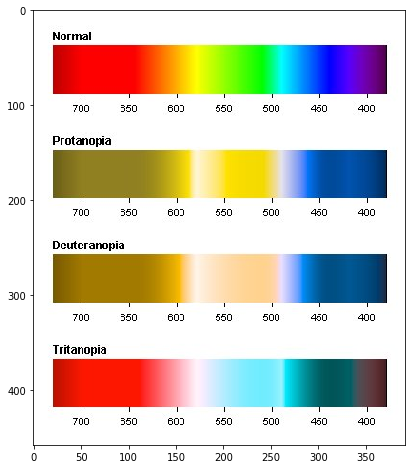

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(exemplo)

## Objetivo
O objetivo deste projeto é simular a protanopia e deuteranopia. A partir do artigo "Digital Video Colourmaps for Checking the Legibility of Displays by Dichromats", de Françoise Viénot, Hans Brettel e John D. Mollon, publicado em Janeiro de 1999, os autores discutem a relação entre o modelo de cor RGB, comumente associado à imagens reproduzidas em dispositivos eletrônicos, e o modelo LMS, baseado nos 3 comprimentos de onda que o olho humano é capaz de interpretar como cores, graças às células cones. Com a relação entre os dois modelos fundamentada, os autores associam a questão da protanopia e da deuteranopia com a relação entre o modelo LMS e RGB, assim obtendo um caminho para a simulação desejada neste projeto.

## Metodologia
O trabalho se baseará na transformação da imagem abaixo, uma vez para simulação de protanopia e outra para deuteranopia

In [4]:
teste = cv2.imread("teste.jpg")
teste = cv2.cvtColor(teste, cv2.COLOR_BGR2RGB)

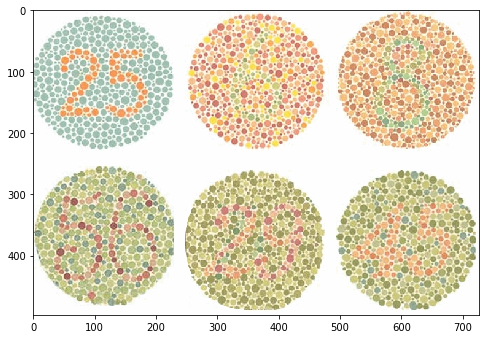

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(teste)

In [37]:
def transforma(img, tipo):
    rgb = deepcopy(img)
    
    # 1 - Quantidades fotométricas relativas de R,G,B
    
    rgb = (rgb/255)**2.2
    
    
    # 2 - Redução do dom;inio das cores
    
    if tipo == "protanopia":
        rgb[:,:,:] *= 0.992052
        rgb[:,:,:] += 0.003974
    elif tipo == "deuteranopia":
        rgb[:,:,:] *=  0.957237
        rgb[:,:,:] += 0.0213814
    else: return 1
    
    # 3
    
    lms = np.zeros(img.shape)
    lms[:,:,0] = rgb[:,:,0]*17.8824 + rgb[:,:,1]*43.5161 + rgb[:,:,2]*4.11935
    lms[:,:,1] = rgb[:,:,0]*3.45565 + rgb[:,:,1]*27.1554 + rgb[:,:,2]*3.86714
    lms[:,:,2] = rgb[:,:,0]*0.0299566 + rgb[:,:,1]*0.184309 + rgb[:,:,2]*1.46709
    
    lms_mod = np.zeros(img.shape)
    if tipo == "protanopia":
        lms_mod[:,:,0] = lms[:,:,0]*0 + lms[:,:,1]*2.02344 + lms[:,:,2]*(-2.52581)
        lms_mod[:,:,1] = lms[:,:,0]*0 + lms[:,:,1]*1 + lms[:,:,2]*0
        lms_mod[:,:,2] = lms[:,:,0]*0 + lms[:,:,1]*0 + lms[:,:,2]*1
    elif tipo == "deuteranopia":
        lms_mod[:,:,0] = lms[:,:,0]*1 + lms[:,:,1]*0 + lms[:,:,2]*0
        lms_mod[:,:,1] = lms[:,:,0]*0.494207 + lms[:,:,1]*0 + lms[:,:,2]*1.24827
        lms_mod[:,:,2] = lms[:,:,0]*0 + lms[:,:,1]*0 + lms[:,:,2]*1
        
    rgb_mod = np.zeros(img.shape)
    rgb_mod[:,:,0] = lms_mod[:,:,0]*0.080944 + lms_mod[:,:,1]*(-0.130504) + lms_mod[:,:,2]*0.116721
    rgb_mod[:,:,1] = lms_mod[:,:,0]*(-0.0102485) + lms_mod[:,:,1]*0.0540194 + lms_mod[:,:,2]*(-0.113615)
    rgb_mod[:,:,2] = lms_mod[:,:,0]*(-0.000365294) + lms_mod[:,:,1]*(-0.00412163) + lms_mod[:,:,2]*0.693513
    
    return (255*(rgb_mod**(1/2.2))).astype(int)

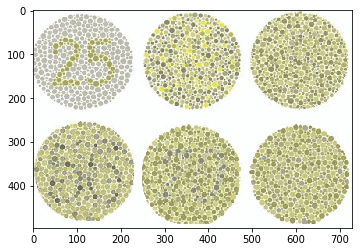

In [38]:
image = transforma(deepcopy(teste), "protanopia")


#plt.imshow(liu)
plt.imshow(image)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in power
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


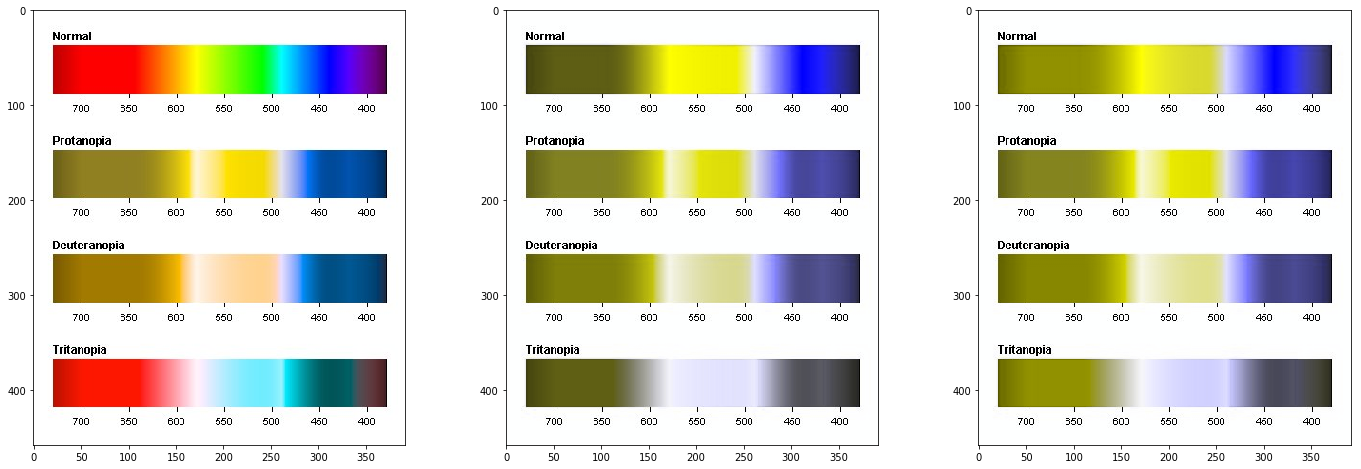

In [39]:
plt.figure(figsize=(24,8))
plt.subplot(131)
plt.imshow(exemplo)
plt.subplot(132)
plt.imshow(transforma(deepcopy(exemplo), "protanopia"))
plt.subplot(133)
plt.imshow(transforma(deepcopy(exemplo), "deuteranopia"))

### Protanopia


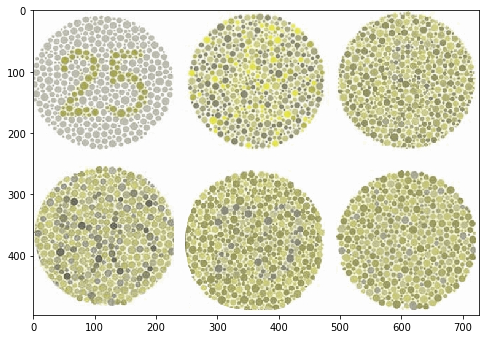

In [8]:
teste_protanopia = deepcopy(teste)
img_protanopia = transforma(teste_protanopia, "protanopia")
plt.figure(figsize=(8,8))
plt.imshow(img_protanopia)

In [9]:
teste_protanopia_rgb = deepcopy(teste)

In [10]:
teste_protanopia_rgb = (teste_protanopia_rgb/255)**2.2

In [11]:
for i in range(3):
    teste_protanopia_rgb[:,:,i] = teste_protanopia_rgb[:,:,i]*0.992052 + 0.003974

In [12]:
matriz1 = np.array([[17.8824, 43.5161, 4.11925], [3.45565, 27.1554, 3.86714], [0.0299566, 0.184309, 1.46709]])
matriz2 = np.array([[0, 2.02344, -2.52581], [0, 1, 0], [0, 0, 1]])
matriz3 = np.array([[0.080944, -0.130504, 0.116721], [-0.0102485, 0.0540194, -0.113615], [-0.000365294, -0.00412163, 0.693513]])

#teste_protanopia_rgb_modificado = np.dot(matriz3, np.dot(matriz2, np.dot(matriz1, teste_protanopia_rgb)))
#teste_protanopia_rgb_modificado = np.sum(matriz3 * np.sum(matriz2 * np.sum(matriz1 * teste_protanopia_rgb)))

teste_protanopia_lms = np.zeros(teste.shape)

teste_protanopia_lms[:,:,0] = teste_protanopia_rgb[:,:,0]*17.8824 + teste_protanopia_rgb[:,:,1]*43.5161 + teste_protanopia_rgb[:,:,2]*4.11935
teste_protanopia_lms[:,:,1] = teste_protanopia_rgb[:,:,0]*3.45565 + teste_protanopia_rgb[:,:,1]*27.1554 + teste_protanopia_rgb[:,:,2]*3.86714
teste_protanopia_lms[:,:,2] = teste_protanopia_rgb[:,:,0]*0.0299566 + teste_protanopia_rgb[:,:,1]*0.184309 + teste_protanopia_rgb[:,:,2]*1.46709

teste_protanopia_lms_mod = np.zeros(teste.shape)

teste_protanopia_lms_mod[:,:,0] = teste_protanopia_lms[:,:,0]*0 + teste_protanopia_lms[:,:,1]*2.02344 + teste_protanopia_lms[:,:,2]*(-2.52581)
teste_protanopia_lms_mod[:,:,1] = teste_protanopia_lms[:,:,0]*0 + teste_protanopia_lms[:,:,1]*1 + teste_protanopia_lms[:,:,2]*0
teste_protanopia_lms_mod[:,:,2] = teste_protanopia_lms[:,:,0]*0 + teste_protanopia_lms[:,:,1]*0 + teste_protanopia_lms[:,:,2]*1

teste_protanopia_rgb_mod = np.zeros(teste.shape)

teste_protanopia_rgb_mod[:,:,0] = teste_protanopia_lms_mod[:,:,0]*0.080944 + teste_protanopia_lms_mod[:,:,1]*(-0.130504) + teste_protanopia_lms_mod[:,:,2]*0.116721
teste_protanopia_rgb_mod[:,:,1] = teste_protanopia_lms_mod[:,:,0]*(-0.0102485) + teste_protanopia_lms_mod[:,:,1]*0.0540194 + teste_protanopia_lms_mod[:,:,2]*(-0.113615)
teste_protanopia_rgb_mod[:,:,2] = teste_protanopia_lms_mod[:,:,0]*(-0.000365294) + teste_protanopia_lms_mod[:,:,1]*(-0.00412163) + teste_protanopia_lms_mod[:,:,2]*0.693513

In [13]:
teste_protanopia_rgb_mod.shape

(497, 728, 3)

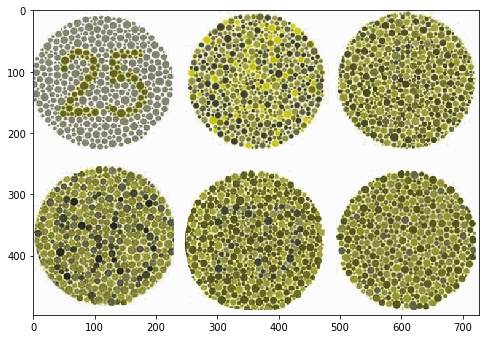

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(teste_protanopia_rgb_mod)

### Deuteranopia

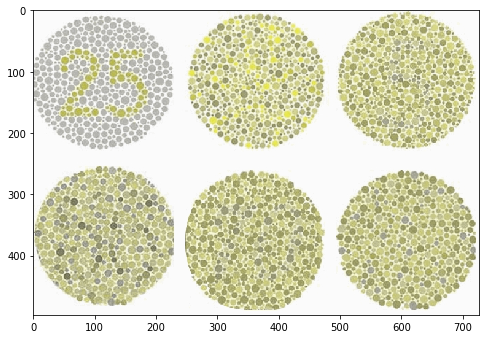

In [15]:
teste_deuteranopia = deepcopy(teste)
img_deuteranopia = transforma(teste_deuteranopia, "deuteranopia")
plt.figure(figsize=(8,8))
plt.imshow(img_deuteranopia)

In [16]:
teste_deuteranopia_rgb = deepcopy(teste)

In [17]:
teste_deuteranopia_rgb = (teste_deuteranopia_rgb/255)**2.2

In [18]:
for i in range(3):
    teste_deuteranopia_rgb[:,:,i] = teste_deuteranopia_rgb[:,:,i]*0.957237 + 0.0213814

In [19]:
matriz5 = np.array([[1, 0, 0], [0.494207, 0, 1.24827], [0, 0, 1]])

#teste_deuteranopia_rgb_modificado = np.dot(matriz6, np.dot(matriz5, np.dot(matriz4, teste_deuteranopia_rgb)))
#teste_deuteranopia_rgb_modificado = np.sum(matriz6 * np.sum(matriz5 * np.sum(matriz4 * teste_deuteranopia_rgb)))

teste_deuteranopia_lms = np.zeros(teste.shape)

teste_deuteranopia_lms[:,:,0] = teste_deuteranopia_rgb[:,:,0]*17.8824 + teste_deuteranopia_rgb[:,:,1]*43.5161 + teste_deuteranopia_rgb[:,:,2]*4.11935
teste_deuteranopia_lms[:,:,1] = teste_deuteranopia_rgb[:,:,0]*3.45565 + teste_deuteranopia_rgb[:,:,1]*27.1554 + teste_deuteranopia_rgb[:,:,2]*3.86714
teste_deuteranopia_lms[:,:,2] = teste_deuteranopia_rgb[:,:,0]*0.0299566 + teste_deuteranopia_rgb[:,:,1]*0.184309 + teste_deuteranopia_rgb[:,:,2]*1.46709

teste_deuteranopia_lms_mod = np.zeros(teste.shape)

teste_deuteranopia_lms_mod[:,:,0] = teste_deuteranopia_lms[:,:,0]*1 + teste_deuteranopia_lms[:,:,1]*0 + teste_deuteranopia_lms[:,:,2]*0
teste_deuteranopia_lms_mod[:,:,1] = teste_deuteranopia_lms[:,:,0]*0.494207 + teste_deuteranopia_lms[:,:,1]*0 + teste_deuteranopia_lms[:,:,2]*1.24827
teste_deuteranopia_lms_mod[:,:,2] = teste_deuteranopia_lms[:,:,0]*0 + teste_deuteranopia_lms[:,:,1]*0 + teste_deuteranopia_lms[:,:,2]*1

teste_deuteranopia_rgb_mod = np.zeros(teste.shape)

teste_deuteranopia_rgb_mod[:,:,0] = teste_deuteranopia_lms_mod[:,:,0]*0.080944 + teste_deuteranopia_lms_mod[:,:,1]*(-0.130504) + teste_deuteranopia_lms_mod[:,:,2]*0.116721
teste_deuteranopia_rgb_mod[:,:,1] = teste_deuteranopia_lms_mod[:,:,0]*(-0.0102485) + teste_deuteranopia_lms_mod[:,:,1]*0.0540194 + teste_deuteranopia_lms_mod[:,:,2]*(-0.113615)
teste_deuteranopia_rgb_mod[:,:,2] = teste_deuteranopia_lms_mod[:,:,0]*(-0.000365294) + teste_deuteranopia_lms_mod[:,:,1]*(-0.00412163) + teste_deuteranopia_lms_mod[:,:,2]*0.693513

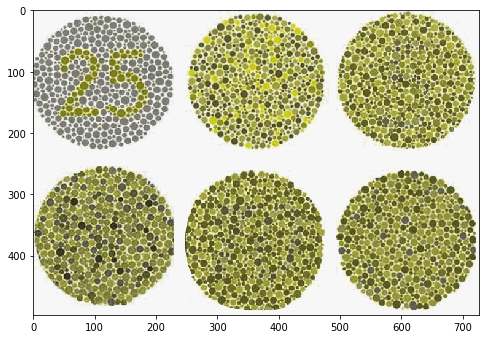

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(teste_deuteranopia_rgb_mod)

## Teste

### Protanopia

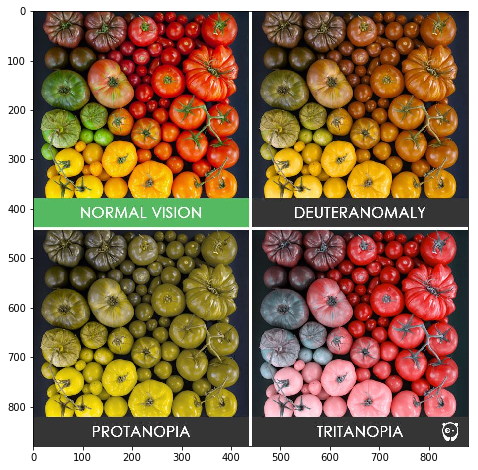

In [21]:
teste2 = cv2.imread("teste 2.jpg")
teste2 = cv2.cvtColor(teste2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(teste2)

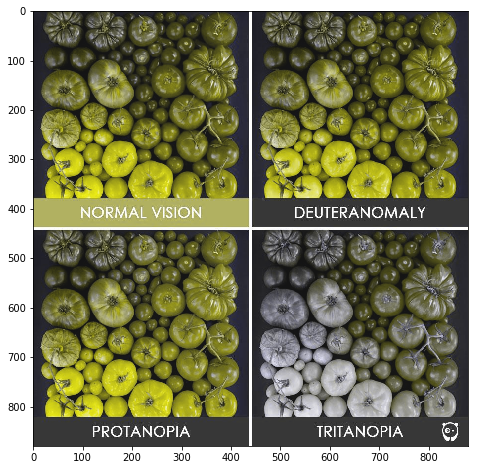

In [22]:
teste2_protanopia = deepcopy(teste2)
teste2_protanopia = transforma(teste2_protanopia, "protanopia")
teste2_protanopia.shape
plt.figure(figsize=(8,8))
plt.imshow(teste2_protanopia)

### Deuteranopia

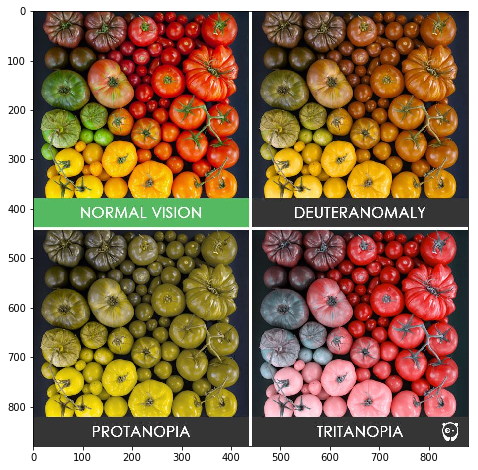

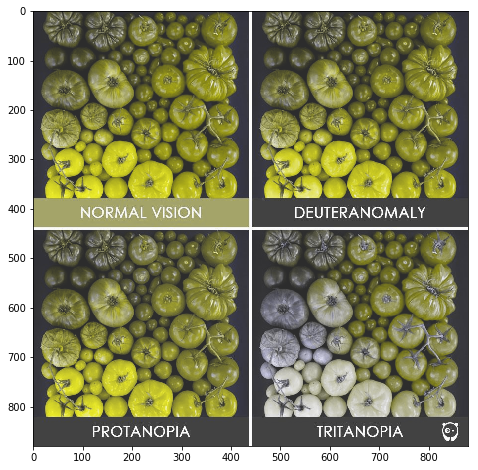

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(teste2)

teste2_deuteranopia = deepcopy(teste2)
teste2_deuteranopia = transforma(teste2_deuteranopia, "deuteranopia")
teste2_deuteranopia.shape
plt.figure(figsize=(8,8))
plt.imshow(teste2_deuteranopia)